This notebook will be used only for the purposes of the **Capstone project** for the _IBM Data Science Professional certificate_

# 1. Importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


# Scrape data from Wikipedia page into a DataFrame

* Importing BeautifulSoup for web scraping
* Importing requests for getting HTML content of the website
* Importing lxml for processing xml and html content

In [2]:
from bs4 import BeautifulSoup
import requests
import lxml.html as lh

Passing the content from the website to a 'source' object.

Then creating an 'soup' object of BeautifulSoup to web scrap the data from the webiste

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source,'lxml')

Make the content more visible and readable

In [4]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XptJpgpAICsAAFpdq2oAAAAK","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":951325562,"wgRevisionId":951325562,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toron

Using the 'find' function of BeautifulSoup to find the table of interest

In [5]:
match = soup.find('table',class_='wikitable sortable')
print(match.prettify())

<table class="wikitable sortable">
 <tbody>
  <tr>
   <th>
    Postal code
   </th>
   <th>
    Borough
   </th>
   <th>
    Neighborhood
   </th>
  </tr>
  <tr>
   <td>
    M1A
   </td>
   <td>
    Not assigned
   </td>
   <td>
   </td>
  </tr>
  <tr>
   <td>
    M2A
   </td>
   <td>
    Not assigned
   </td>
   <td>
   </td>
  </tr>
  <tr>
   <td>
    M3A
   </td>
   <td>
    North York
   </td>
   <td>
    Parkwoods
   </td>
  </tr>
  <tr>
   <td>
    M4A
   </td>
   <td>
    North York
   </td>
   <td>
    Victoria Village
   </td>
  </tr>
  <tr>
   <td>
    M5A
   </td>
   <td>
    Downtown Toronto
   </td>
   <td>
    Regent Park / Harbourfront
   </td>
  </tr>
  <tr>
   <td>
    M6A
   </td>
   <td>
    North York
   </td>
   <td>
    Lawrence Manor / Lawrence Heights
   </td>
  </tr>
  <tr>
   <td>
    M7A
   </td>
   <td>
    Downtown Toronto
   </td>
   <td>
    Queen's Park / Ontario Provincial Government
   </td>
  </tr>
  <tr>
   <td>
    M8A
   </td>
   <td>
    Not assig

Converting the match object to a string and then passing  it to pandas read_html to be converted to a dataframe 

In [6]:
df = pd.read_html(str(match))
df1 = df[0]

**The dataframe consists of three columns: PostalCode, Borough, and Neighborhood**

In [7]:
df1.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [8]:
df1.shape

(180, 3)

In [9]:
# Checking for Null values
df1.isnull().sum()

Postal code      0
Borough          0
Neighborhood    77
dtype: int64

# Selecting the rows having only assigned Borough

**Processing the cells that have an assigned borough.**
_(Ignore cells with a borough that is Not assigned)_

In [10]:
# However we can see missing values for the column 'Borough'
df1[df1['Borough']=='Not assigned']

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
7,M8A,Not assigned,NaN
10,M2B,Not assigned,NaN
15,M7B,Not assigned,NaN
16,M8B,Not assigned,NaN
19,M2C,Not assigned,NaN
24,M7C,Not assigned,NaN
25,M8C,Not assigned,NaN
28,M2E,Not assigned,NaN


In [11]:
# Converting the 'Not assigned' in 'Borough' column to nan values
df1.replace('Not assigned',np.nan, inplace=True)

In [12]:
# drop the rows in the dataframe where 'Borough' is null
df1.dropna(subset=['Borough'], inplace=True)

In [13]:
df1.isnull().sum()

Postal code     0
Borough         0
Neighborhood    0
dtype: int64

In [14]:
# we have sucessfully removed null values from the dataset

# Print the shape of the dataframe

In [15]:
df1.shape

(103, 3)

# Group neighborhoods in the same borough

More than one neighborhood can exist in one postal code area. 
For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: 
Harbourfront and Regent Park. 


**These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.**

In [16]:
# group neighborhoods in the same borough
df1_grouped = df1.groupby(["Postal code", "Borough"], as_index=False).agg(lambda x: ", ".join(x))
df1_grouped.head()

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [17]:
#replacing the '/' in Neighborhood to ','
df1_grouped['Neighborhood'] = df1_grouped['Neighborhood'].str.replace(' /',',')
df1_grouped.head()

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [18]:
#to make it easier, we will store this in csv format.
#Export to .CSV
df1_grouped.to_csv('Toronto_Postcodes.csv')

# Loading the coordinates from geo coordinates of Canada from CSV 

**Creating a dataset that has the location coordinates of each location in Canada**

In [19]:
geo = pd.read_csv('Geospatial_Coordinates.csv')
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [20]:
#use the previously cleaned data
df_neighborhoods = pd.read_csv('Toronto_Postcodes.csv',index_col=[0])
df_neighborhoods.head()

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [21]:
# Let's rename 'Postal code' to 'Postal Code' so that both files have same column name
df_neighborhoods.rename(columns={'Postal code':'Postal Code'}, inplace=True)

In [22]:
df_neighborhoods.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


# Merge two tables to get the coordinates

In [23]:
df2 = df_neighborhoods.merge(geo, how='left',left_on='Postal Code', right_on='Postal Code')
df2.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [24]:
#Export to .CSV
df2.to_csv('Toronto_Postcodes_2.csv')

In [25]:
import folium
from sklearn.cluster import KMeans

In [26]:
# Read .csv file from above
df = pd.read_csv('Toronto_Postcodes_2.csv', index_col=0)
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [27]:
df['Borough'].nunique()

10

In [28]:
df['Neighborhood'].nunique()

98

In [29]:
# There are 10 Boroughs and 98 neighborhoods

In [30]:
#count Bourough and Neighborhood
df[['Borough','Neighborhood']].groupby('Borough').count()

,Neighborhood
Borough,
Central Toronto,9
Downtown Toronto,19
East Toronto,5
East York,5
Etobicoke,12
Mississauga,1
North York,24
Scarborough,17
West Toronto,6


In [31]:
# We can imply that the most packed neighborhood is North York, followed by Downtown Toronto and East York

In [32]:
df_toronto_only = df[df['Borough'].str.contains('Toronto')]
df_toronto_only.reset_index(inplace=True)
df_toronto_only.drop('index', axis=1, inplace=True)
df_toronto_only.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [33]:
# Check the number of neighborhoods
print(df_toronto_only.groupby('Borough').count()['Neighborhood'])

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
West Toronto         6
Name: Neighborhood, dtype: int64


In [34]:
# Create a list with the Boroughs
boroughs = df_toronto_only['Borough'].unique().tolist()
boroughs

['East Toronto', 'Central Toronto', 'Downtown Toronto', 'West Toronto']

In [35]:
# Obtain the coordinates from the dataset by taking a mean of Latitude, Longitude of the points in the dataset 
lat_toronto = df_toronto_only['Latitude'].mean()
lon_toronto = df_toronto_only['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.66713498717948, -79.38987324871795


In [36]:
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

In [37]:
map_toronto_neighborboods = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto_only['Latitude'], 
                                           df_toronto_only['Longitude'],
                                           df_toronto_only['Borough'], 
                                           df_toronto_only['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.7).add_to(map_toronto_neighborboods)  
    
map_toronto_neighborboods

# Getting Nearby Venues using Foursquare

In [38]:
CLIENT_ID = 'LWFU0YD13UXFWOUGVSBEP4WEZWO5OZMGRZ2GBUFWH02UNID5' # your Foursquare ID
CLIENT_SECRET = '213LTSDR1OUOBPUNSSIUDRIA4RGSGFZHGR5EQCBJ4REKNC1R' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LWFU0YD13UXFWOUGVSBEP4WEZWO5OZMGRZ2GBUFWH02UNID5
CLIENT_SECRET:213LTSDR1OUOBPUNSSIUDRIA4RGSGFZHGR5EQCBJ4REKNC1R


In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
# Get venues for all neighborhoods in our dataset
toronto_venues_df = getNearbyVenues(names=df_toronto_only['Neighborhood'],
                                latitudes=df_toronto_only['Latitude'],
                                longitudes=df_toronto_only['Longitude'])

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High Park, The Junction South
Parkdale, Ron

In [41]:
# Check size of resulting dataframe
toronto_venues_df.shape

(863, 7)

In [42]:
toronto_venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [43]:
# Number of venues per neighborhood
toronto_venues_df.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,30,30,30,30,30,30
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
Business reply mail Processing CentrE,17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,30,30,30,30,30,30
Christie,18,18,18,18,18,18
Church and Wellesley,30,30,30,30,30,30
"Commerce Court, Victoria Hotel",30,30,30,30,30,30
Davisville,30,30,30,30,30,30


In [44]:
# Number of unique venue categories
print('There are {} uniques categories.'.format(len(toronto_venues_df['Venue Category'].unique())))

There are 184 uniques categories.


In [45]:
# the list of categories
toronto_venues_df['Venue Category'].unique()[:100]

array(['Trail', 'Health Food Store', 'Pub', 'Neighborhood',
       'Greek Restaurant', 'Cosmetics Shop', 'Italian Restaurant',
       'Ice Cream Shop', 'Yoga Studio', 'Brewery',
       'Fruit & Vegetable Store', 'Pizza Place', 'Bookstore',
       'Restaurant', 'Dessert Shop', 'Juice Bar', 'Bubble Tea Shop',
       'Spa', 'Diner', 'Grocery Store', 'Furniture / Home Store', 'Café',
       'Coffee Shop', 'Bakery', 'Gym', 'Fish & Chips Shop',
       'Fast Food Restaurant', 'Sushi Restaurant', 'Liquor Store', 'Park',
       'Pet Store', 'Steakhouse', 'Burrito Place', 'Movie Theater',
       'Sandwich Place', 'Food & Drink Shop', 'Fish Market', 'Gay Bar',
       'Cheese Shop', 'Middle Eastern Restaurant',
       'Comfort Food Restaurant', 'Thai Restaurant', 'Seafood Restaurant',
       'American Restaurant', 'Stationery Store', 'Coworking Space',
       'Wine Bar', 'Bar', 'Swim School', 'Bus Line', 'Breakfast Spot',
       'Department Store', 'Hotel', 'Chinese Restaurant',
       'Salon / Ba

In [46]:
# check if the results contain "Thai Restaurants"
#please note I changed the data to Thai because I was previously writing the code using Asian but the number is so small
"Ice Cream Shop" in toronto_venues_df['Venue Category'].unique()

True

# Analyze Each Area

In [47]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhoods'] = toronto_venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(863, 185)


,Neighborhoods,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [48]:
to_grouped = toronto_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(39, 185)


,Neighborhoods,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.066667,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.033333,0.0000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.066667,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.033333,0.000000,0.000000,0.000000,0.000000,0.0000,0.066667,0.000000,0.000000,0.0000

Now let's create the new dataframe and display the top 10 venues for each PostalCode.

In [49]:
len(to_grouped[to_grouped["Ice Cream Shop"] > 0])

9

In [50]:
ice_cream_df = to_grouped[["Neighborhoods","Ice Cream Shop"]]
ice_cream_df.head()

,Neighborhoods,Ice Cream Shop
0,Berczy Park,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000
2,Business reply mail Processing CentrE,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000
4,Central Bay Street,0.033333


# Cluster Areas
Run k-means to cluster the Toronto areas.



In [51]:
to_clustering = ice_cream_df.drop(["Neighborhoods"], 1)

**Identify the number of clusters for K-Means**

In [52]:
cluster_range=range(1,10)
cluster_wss=[]

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(to_clustering)
    cluster_wss.append(clusters.inertia_)    # store WSS of cluster

from collections import OrderedDict
clusters_df=pd.DataFrame(OrderedDict ({'num_clusters':cluster_range, 'cluster_wss': cluster_wss}))
clusters_df[0:9]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  import sys


,num_clusters,cluster_wss
0,1,2.463771e-01
1,2,1.077933e-02
2,3,1.031746e-03
3,4,1.749271e-04
4,5,3.791675e-34
5,6,1.805559e-35
6,7,1.805559e-35
7,8,1.805559e-35
8,9,1.805559e-35


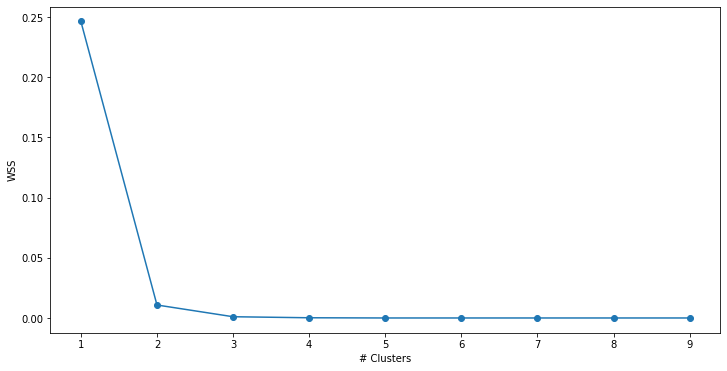

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(clusters_df.num_clusters),max(clusters_df.num_clusters)+1, 1.0))  # on x-axis, tick marks after interval of 1
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss, marker="o")
plt.show()

In [54]:
# set number of clusters
toclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=0, init="k-means++", n_init=12).fit(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 2, 0, 0, 2, 0, 0])

In [56]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = ice_cream_df.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [57]:
to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head()

,Neighborhood,Ice Cream Shop,Cluster Labels
0,Berczy Park,0.000000,0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0
2,Business reply mail Processing CentrE,0.000000,0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0
4,Central Bay Street,0.033333,2


In [58]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(toronto_venues_df.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(863, 9)


,Neighborhood,Ice Cream Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.0,0,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
0,Berczy Park,0.0,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
0,Berczy Park,0.0,0,43.644771,-79.373306,Fresh On Front,43.647815,-79.374453,Vegetarian / Vegan Restaurant
0,Berczy Park,0.0,0,43.644771,-79.373306,Meridian Hall,43.646292,-79.376022,Concert Hall
0,Berczy Park,0.0,0,43.644771,-79.373306,Hockey Hall Of Fame (Hockey Hall of Fame),43.646974,-79.377323,Museum


In [59]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(863, 9)


,Neighborhood,Ice Cream Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.000000,0,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
24,"Regent Park, Harbourfront",0.000000,0,43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market
24,"Regent Park, Harbourfront",0.000000,0,43.654260,-79.360636,SOMA chocolatemaker,43.650622,-79.358127,Chocolate Shop
24,"Regent Park, Harbourfront",0.000000,0,43.654260,-79.360636,Rooster Coffee,43.651900,-79.365609,Coffee Shop
24,"Regent Park, Harbourfront",0.000000,0,43.654260,-79.360636,Cacao 70,43.650067,-79.360723,Dessert Shop
24,"Regent Park, Harbourfront",0.000000,0,43.654260,-79.360636,Arvo,43.649963,-79.361442,Coffee Shop
24,"Regent Park, Harbourfront",0.000000,0,43.654260,-79.360636,Alumnae Theatre,43.652756,-79.364753,Theater
24,"Regent Park, Harbourfront",0.000000,0,43.654260,-79.360636,Sumach Espresso,43.658135,-79.359515,Coffee Shop
24,"Regent Park, Harbourfront",0.000000,0,43.654260,-79.360636,Young Centre for the Performing Arts,43.650825,-79.357593,Performing Arts Venue
24,"Regent Park, Harbourfront",0.000000,0,43.654260,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub


In [60]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [61]:
# create map
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(toclusters)
ys = [i+x+(i*x)**2 for i in range(toclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [62]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

# Examine the created clusters

**Cluster 1**

In [63]:
#Cluster 0
to_merged.loc[to_merged['Cluster Labels'] == 0]

,Neighborhood,Ice Cream Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.0,0,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
24,"Regent Park, Harbourfront",0.0,0,43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,Farmers Market
24,"Regent Park, Harbourfront",0.0,0,43.654260,-79.360636,SOMA chocolatemaker,43.650622,-79.358127,Chocolate Shop
24,"Regent Park, Harbourfront",0.0,0,43.654260,-79.360636,Rooster Coffee,43.651900,-79.365609,Coffee Shop
24,"Regent Park, Harbourfront",0.0,0,43.654260,-79.360636,Cacao 70,43.650067,-79.360723,Dessert Shop
24,"Regent Park, Harbourfront",0.0,0,43.654260,-79.360636,Arvo,43.649963,-79.361442,Coffee Shop
24,"Regent Park, Harbourfront",0.0,0,43.654260,-79.360636,Alumnae Theatre,43.652756,-79.364753,Theater
24,"Regent Park, Harbourfront",0.0,0,43.654260,-79.360636,Sumach Espresso,43.658135,-79.359515,Coffee Shop
24,"Regent Park, Harbourfront",0.0,0,43.654260,-79.360636,Young Centre for the Performing Arts,43.650825,-79.357593,Performing Arts Venue
24,"Regent Park, Harbourfront",0.0,0,43.654260,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub


**Cluster 2**

In [64]:
#Cluster 1
to_merged.loc[to_merged['Cluster Labels'] == 1]

,Neighborhood,Ice Cream Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
27,Roselawn,0.5,1,43.711695,-79.416936,Menchie's St. Clair West,43.707664,-79.414301,Ice Cream Shop
27,Roselawn,0.5,1,43.711695,-79.416936,Rosalind's Garden Oasis,43.712189,-79.411978,Garden


**Cluster 3**

In [65]:
#Cluster 2
to_merged.loc[to_merged['Cluster Labels'] == 2]

,Neighborhood,Ice Cream Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
32,Studio District,0.033333,2,43.659526,-79.340923,Hooked,43.660407,-79.343257,Fish Market
32,Studio District,0.033333,2,43.659526,-79.340923,Purple Penguin Cafe,43.660501,-79.342565,Café
32,Studio District,0.033333,2,43.659526,-79.340923,Mercury Espresso Bar,43.660806,-79.341241,Coffee Shop
32,Studio District,0.033333,2,43.659526,-79.340923,Leslieville,43.662070,-79.337856,Neighborhood
32,Studio District,0.033333,2,43.659526,-79.340923,WAYLABAR,43.661234,-79.339597,Gay Bar
32,Studio District,0.033333,2,43.659526,-79.340923,Leslieville Cheese Market,43.660546,-79.342302,Cheese Shop
32,Studio District,0.033333,2,43.659526,-79.340923,Baldini,43.661300,-79.339027,Italian Restaurant
32,Studio District,0.033333,2,43.659526,-79.340923,Tabule,43.659731,-79.346341,Middle Eastern Restaurant
32,Studio District,0.033333,2,43.659526,-79.340923,eastside social,43.661289,-79.339155,Comfort Food Restaurant
32,Studio District,0.033333,2,43.659526,-79.340923,EAT BKK Thai Kitchen,43.660450,-79.343113,Thai Restaurant


**Observations and Analysis:**

As mentioned in the clusters, we can confidently say that most ice-cream parlors are in the 3 Cluster (8 Ice-Cream parlors covering large area)

In the 2 Cluster, in the Roselawn area there is 1 Ice-Cream parlour which is sufficient.

In the 1 Cluster there are no Ice-Cream parlours. Cluser 1 covers large number of neighbourhood areas. 


**Conclusion:**

My take is, that the ice-cream startup should open its ice-cream parlour in the neighbourhoods of Cluster 1. The advantage is that as there isnt any major ice-cream retailer thaere there will be a great demand for the ice-creams. An added advantage is there seems to be many cafe, restauranty and entertainment hubs which will give the provide the ice-cream business enough market popularity and exposure and hopefully igf the ice-cream is a hit with consumers it will be a major win for the young ice-cream startup.